<IPython.core.display.Javascript object>


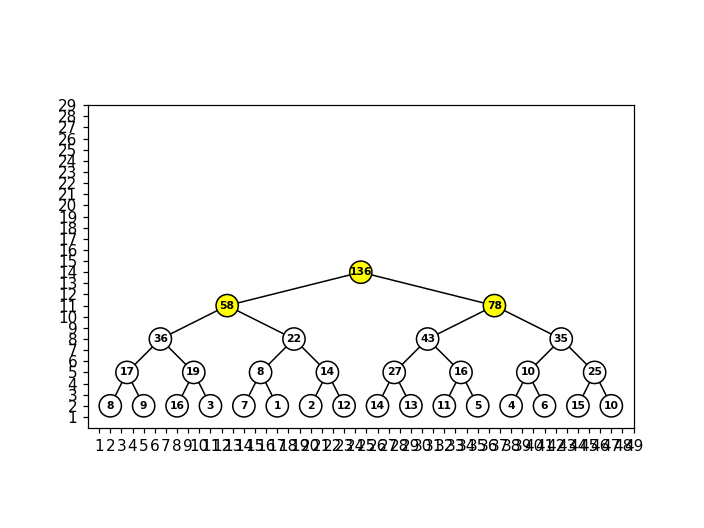

VBox()

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from matplotlib.patches import PathPatch
from matplotlib.patches import Path
from matplotlib.transforms import Bbox
import random 
%matplotlib nbagg 

class crear_segment_tree: 
    #va a crear un arreglo del doble 
    #este arreglo va a tener la coordenada y anotacion de el segment tree 
    #o mejor asi [[i,c,anot],....]
    #eso lo tenemoa que calcular ponerlos en rojo y luego en amarillo
    ind = len(arr_entrada) - 1
    painted_nodes = [] 
    seg_tree = []
    def poner_linea(self,u,v): 
        xu,yu = self.seg_tree[u][1].get_center()
        xv,yv = self.seg_tree[v][1].get_center()
        linea = PathPatch(Path([self.inter_points(rad,xu,yu,xv,yv),self.inter_points(rad,xv,yv,xu,yu)]), facecolor='none', edgecolor='black')
        ax.add_patch(linea)
    def inter_points(self,rad,x1,y1,x2,y2): 
        phi = math.atan2(y2-y1, x2-x1)
        x = x1 + rad * math.cos(phi)
        y = y1 + rad * math.sin(phi)
        return (x,y)
    def __init__(self): 
        #cambiar layout 
        
        #creacion del árbol 
        self.seg_tree = [[None,None,None] for i in range(0,2*len(arr_entrada))] 
        n = len(arr_entrada)
        curr_x = 2 
        first_y = 2 
        for i in range(0,len(arr_entrada)):
            c = Circle((curr_x,first_y),radius = rad,facecolor = 'white',edgecolor = 'black')
            ax.add_patch(c)
            anot = ax.annotate(str(arr_entrada[i]), (curr_x, first_y), color='black', weight='bold', fontsize=7, ha='center', va='center')
            self.seg_tree[i + n] = [arr_entrada[i],c,anot]
            curr_x = curr_x + 3*rad       
         #pintar el resto del árbol 
        for i in range(n-1,0,-1): 
            xl,yl = self.seg_tree[2*i][1].get_center()
            xr,yr = self.seg_tree[2*i+1][1].get_center()
            x = (xl + xr) / 2 
            y = yl + 3*rad
            c = Circle((x,y),radius = rad,facecolor = 'white',edgecolor = 'black')
            ax.add_patch(c)
            anot = ax.annotate(str(""), (x, y), color='black', weight='bold', fontsize=7, ha='center', va='center')
            self.seg_tree[i] = [self.seg_tree[2*i][0] + self.seg_tree[2*i+1][0],c,anot]
            self.poner_linea(i,2*i)
            self.poner_linea(i,2*i+1)
            
   
    
    def next_button_handler(self,event):
        #actualizar posicion de nivel
        if(self.painted_nodes): 
            for c in self.painted_nodes:
                c.set(facecolor = 'white')
                self.painted_nodes = []
        [i,c,anot] = self.seg_tree[self.ind]
        lc = self.seg_tree[self.ind*2][1]
        rc = self.seg_tree[self.ind*2+1][1]
        self.painted_nodes = [c,lc,rc]
        anot.set(text = str(i))
        for x in self.painted_nodes: 
            x.set(facecolor = 'yellow')
        self.ind = self.ind - 1

    def main(self):
        next_button = widgets.Button(description='siguiente')
        controles.children = [next_button]
        next_button.on_click(self.next_button_handler)
fig, ax = plt.subplots()
maxim_x = 50
maxim_y = 30
plt.xticks(range(1,maxim_x))
plt.yticks(range(1,maxim_y))
plt.gca().set_aspect('equal', adjustable='box')
controles = widgets.VBox([])
display(controles)
#algunas variables globales 
rad = 1
arr_entrada = [i for i in range(1,17)]
random.shuffle(arr_entrada)
estado = crear_segment_tree()
estado.main()

